# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [1]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup as soup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
browser = Browser('chrome')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [3]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [4]:
# Create a Beautiful Soup Object
html = browser.html
soup = soup(html, 'html.parser')

In [5]:
# Extract all rows of data
table_rows = soup.find("tbody").find_all("tr")
columns = [th.text for th in table_rows[0].find_all("th")]
#print(columns)
#print(table_rows)

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [6]:
# Create an empty list to store the scraped data
mars_list = []

# Loop through the rows of the table (excluding the header row)
# Iterate over each row of data
for row in table_rows[1:]:
    # Extract data from cells and create a dictionary
    cells = row.find_all("td")
    row_dict = {
        columns[i]: cells[i].text.strip() for i in range(len(columns))
    }
        # Append the dictionary representing the row to the list
    mars_list.append(row_dict)

# Print the list of dictionaries
print(mars_list)


[{'id': '2', 'terrestrial_date': '2012-08-16', 'sol': '10', 'ls': '155', 'month': '6', 'min_temp': '-75.0', 'pressure': '739.0'}, {'id': '13', 'terrestrial_date': '2012-08-17', 'sol': '11', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '740.0'}, {'id': '24', 'terrestrial_date': '2012-08-18', 'sol': '12', 'ls': '156', 'month': '6', 'min_temp': '-76.0', 'pressure': '741.0'}, {'id': '35', 'terrestrial_date': '2012-08-19', 'sol': '13', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '732.0'}, {'id': '46', 'terrestrial_date': '2012-08-20', 'sol': '14', 'ls': '157', 'month': '6', 'min_temp': '-74.0', 'pressure': '740.0'}, {'id': '57', 'terrestrial_date': '2012-08-21', 'sol': '15', 'ls': '158', 'month': '6', 'min_temp': '-78.0', 'pressure': '740.0'}, {'id': '68', 'terrestrial_date': '2012-08-22', 'sol': '16', 'ls': '158', 'month': '6', 'min_temp': '-77.0', 'pressure': '740.0'}, {'id': '79', 'terrestrial_date': '2012-08-23', 'sol': '17', 'ls': '159', 'month': '6', 'mi

In [7]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
column_names = ['id', 'terrestrial_date','sol','ls', 'month',  'min_temp','pressure']
mars_df = pd.DataFrame(mars_list, columns=column_names)


In [8]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [9]:
# Examine data type of each column
print(mars_df.dtypes)

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object


In [10]:
# Change data types for data analysis
mars_df['id'] = mars_df['id'].astype(object)
# Convert 'terrestrial_date' column to datetime
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Convert other columns to appropriate numeric types
mars_df['sol'] = mars_df['sol'].astype('int64')
mars_df['ls'] = mars_df['ls'].astype('int64')
mars_df['month'] = mars_df['month'].astype('int64')
mars_df['min_temp'] = mars_df['min_temp'].astype(float)
mars_df['pressure'] = mars_df['pressure'].astype(float)



In [11]:
# Confirm type changes were successful by examining data types again
print(mars_df.dtypes)

id                          object
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [12]:
# 1. How many months are there on Mars?
num_months = (mars_df['month'].value_counts().sort_index())
num_months.index.name = None
print(num_months)

1     174
2     178
3     192
4     194
5     149
6     147
7     142
8     141
9     134
10    112
11    138
12    166
Name: count, dtype: int64


In [13]:
# 2. How many Martian days' worth of data are there?
num_sols = len(mars_df['sol'].unique())
print(num_sols)


1867


In [14]:
# 3. What is the average low temperature by month?
# Group the data by month and calculate the mean of the min_temp column
average_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Print the result
print(average_low_temp_by_month)


month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64


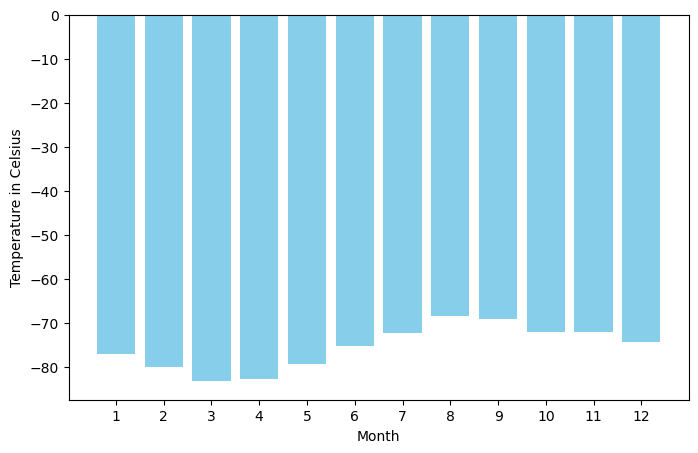

In [15]:
# Plot the average temperature by month
# Import Matplotlib for plotting
import matplotlib.pyplot as plt

# Plot the average temperature by month
plt.figure(figsize=(8, 5))
plt.bar(average_low_temp_by_month.index, average_low_temp_by_month.values, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(range(1, 13))  # Assuming months are represented by integers from 1 to 12
plt.show()


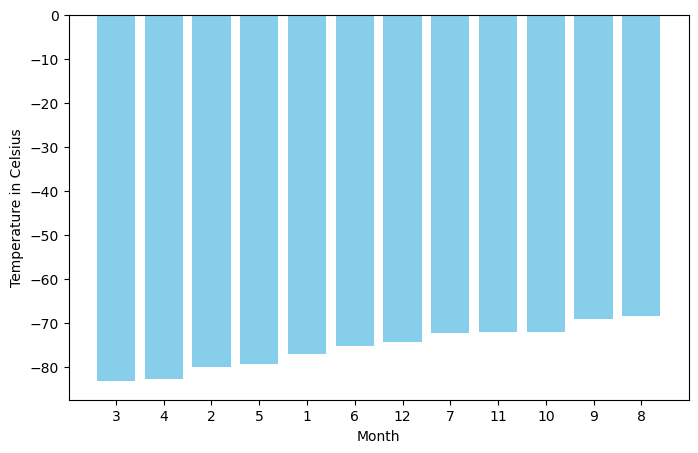

In [16]:
# Import relevant libraries
import matplotlib.pyplot as plt

# Calculate the average minimum temperature by month
average_low_temp_by_month = mars_df.groupby('month')['min_temp'].mean()

# Sort the months by average minimum temperature in ascending order
sorted_average_low_temp = average_low_temp_by_month.sort_values()

# Plot the average temperature by month in ascending order
plt.figure(figsize=(8, 5))
plt.bar(range(1, 13), sorted_average_low_temp, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Temperature in Celsius')
plt.xticks(range(1, 13), sorted_average_low_temp.index)  # Set custom tick labels based on sorted months
plt.show()


In [17]:
# 4. Average pressure by Martian month
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()
# Print the result
print(average_pressure_by_month)

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


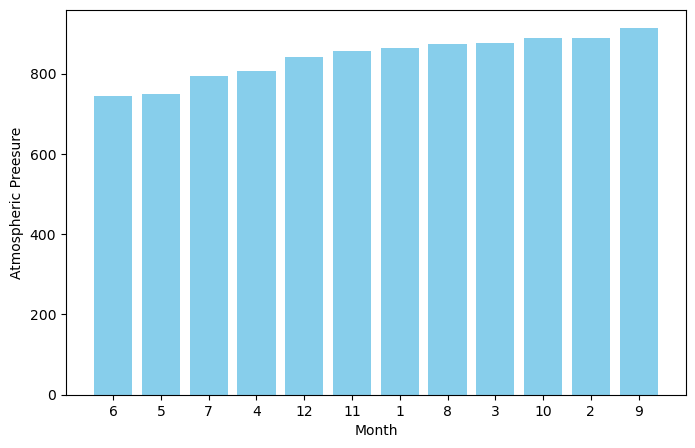

In [18]:
# Plot the average pressure by month
# Import Matplotlib for plotting
import matplotlib.pyplot as plt
average_pressure_by_month = mars_df.groupby('month')['pressure'].mean()

# Sort the months by average minimum temperature in ascending order
sorted_average_pressure = average_pressure_by_month.sort_values()
#print(sorted_average_pressure)

# Plot the average temperature by month
plt.figure(figsize=(8, 5))
plt.bar(range(1, 13), sorted_average_pressure, color='skyblue')
plt.xlabel('Month')
plt.ylabel('Atmospheric Preesure')
plt.xticks(range(1, 13), sorted_average_pressure.index)  # Set custom tick labels based on sorted months
plt.show()


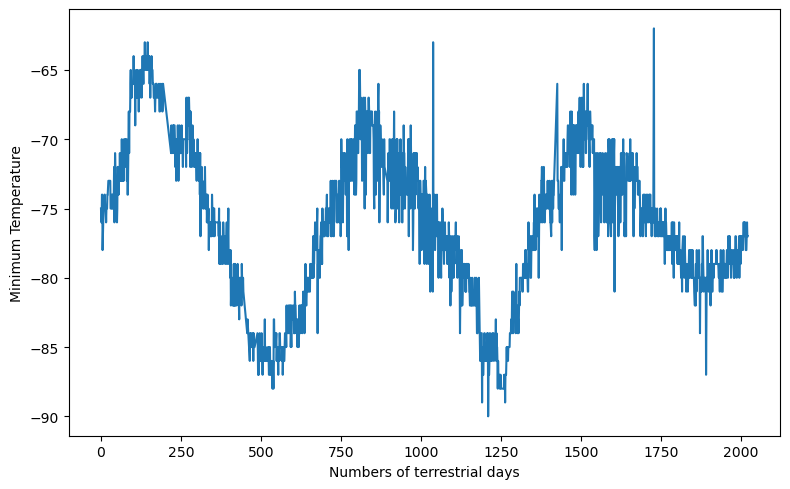

In [19]:
# 5. How many terrestrial (earth) days are there in a Martian year?
# Plot the minimum temperature against time
import numpy as np

# Calculate the difference between consecutive dates
date_diff = np.diff(mars_df['terrestrial_date']).astype('timedelta64[D]').astype(int)

# Calculate the cumulative sum of the date differences to represent each date in terms of Earth days
earth_days = np.insert(np.cumsum(date_diff), 0, 0)

# Plot the minimum temperature against the converted Earth days
plt.figure(figsize=(8, 5))
plt.plot(earth_days, mars_df['min_temp'], linestyle='-')
plt.xlabel('Numbers of terrestrial days')
plt.ylabel('Minimum Temperature')
plt.tight_layout()
plt.show()


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from peak to peak is roughly 1425-750, or 675 days. A year on Mars appears to be about 675 days from the plot. Internet search confirms that a Mars year is equivalent to 687 earth days.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [20]:
# Write the data to a CSV
import pandas as pd

# Assuming 'terrestrial_date' is a column in mars_df DataFrame
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])

# Convert the 'terrestrial_date' column to the desired format
mars_df['terrestrial_date'] = mars_df['terrestrial_date'].dt.strftime('%Y-%m-%d')

# Now the 'terrestrial_date' column is converted to the desired format
print(mars_df['terrestrial_date'])

# Define the filename for the CSV file
csv_filename = "mars_temperature_data.csv"

# Write the data to the CSV file
mars_df.to_csv(csv_filename, index=False, date_format ='%Y-%m-%d')



0       2012-08-16
1       2012-08-17
2       2012-08-18
3       2012-08-19
4       2012-08-20
           ...    
1862    2018-02-23
1863    2018-02-24
1864    2018-02-25
1865    2018-02-26
1866    2018-02-27
Name: terrestrial_date, Length: 1867, dtype: object


In [21]:
browser.quit()